# Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. 
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
# Downloading of WeRateDogs Twitter archive data
import pandas as pd

dog_twitter_arch = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [2]:
# Downloading tweet image prediction file via requests package
import requests
import os

folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
dog_image_predicts = requests.get(url)

In [3]:
# Writing file to OS
with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(dog_image_predicts.content)

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

# Reading in Twitter API data
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = dog_twitter_arch.tweet_id.values

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except AttributeError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [4]:
# Reading data into local file
tweets = pd.read_json('tweet_json.txt', lines=True)

In [5]:
# Querying data into data frame
tweet_count_data = tweets[['id','retweet_count','favorite_count']]

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.


* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Dog Tweets Assessment

In [6]:
# Visual Assessment
dog_twitter_arch

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


- Missing values
- Columns 'doggo', 'floofer', 'pupper', and 'puppo' should be boolean values

In [7]:
# Programmatic Assessment
dog_twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

- Nondescriptive columns (timestamp, text, name)
- 181 retweets
- Timestamp is object and should be datetime

In [8]:
# Programmatic Assessment
dog_twitter_arch['name'].value_counts().head(55)

None        745
a            55
Charlie      12
Cooper       11
Lucy         11
Oliver       11
Tucker       10
Penny        10
Lola         10
Winston       9
Bo            9
Sadie         8
the           8
Daisy         7
Buddy         7
Toby          7
an            7
Bailey        7
Leo           6
Oscar         6
Stanley       6
Rusty         6
Bella         6
Dave          6
Jack          6
Koda          6
Scout         6
Jax           6
Milo          6
Louis         5
Phil          5
Sammy         5
Gus           5
Chester       5
Alfie         5
Sunny         5
Bentley       5
very          5
Oakley        5
Finn          5
George        5
Larry         5
Clarence      4
Loki          4
Walter        4
Reggie        4
Hank          4
Scooter       4
Duke          4
quite         4
Reginald      4
Maggie        4
Luna          4
Maddie        4
Dexter        4
Name: name, dtype: int64

- Some rows have incorrect values for the dog's name when it should be None

In [9]:
# Programmatic Assessment
dog_twitter_arch[dog_twitter_arch['rating_denominator'] != 10].rating_denominator.count()

23

- Number of tweets with rating denominator not equal to ten shown above

In [10]:
# Programmatic Assessment
dog_twitter_arch['retweeted_status_id'].count()

181

- Number of retweets displayed above

In [11]:
# Programmatic Assessment
dog_twitter_arch['in_reply_to_status_id'].count()

78

- Number of tweet replies displayed above

### Retweet and Favorite Count Assessment

In [12]:
# Visual Assessment
tweet_count_data

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


- Nondescriptive column 'id'

In [13]:
# Programmatic Assessment
tweet_count_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


### Dog Image Predictions Assessment

In [14]:
# Visual Assessment
dog_image_predictions = pd.read_csv('image_predictions.tsv')
dog_image_predictions

,tweet_id\tjpg_url\timg_num\tp1\tp1_conf\tp1_dog\tp2\tp2_conf\tp2_dog\tp3\tp3_conf\tp3_dog
0,666020888022790149\thttps://pbs.twimg.com/medi...
1,666029285002620928\thttps://pbs.twimg.com/medi...
2,666033412701032449\thttps://pbs.twimg.com/medi...
3,666044226329800704\thttps://pbs.twimg.com/medi...
4,666049248165822465\thttps://pbs.twimg.com/medi...
...,...
2070,891327558926688256\thttps://pbs.twimg.com/medi...
2071,891689557279858688\thttps://pbs.twimg.com/medi...
2072,891815181378084864\thttps://pbs.twimg.com/medi...
2073,892177421306343426\thttps://pbs.twimg.com/medi...


- All column names and columns are concatenated into one
- Nondescriptive columns
- Row 2074 only compares to food and is not neccessary

In [15]:
# Programmatic Assessment
dog_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 1 columns):
 #   Column                                                                          Non-Null Count  Dtype 
---  ------                                                                          --------------  ----- 
 0   tweet_id	jpg_url	img_num	p1	p1_conf	p1_dog	p2	p2_conf	p2_dog	p3	p3_conf	p3_dog  2075 non-null   object
dtypes: object(1)
memory usage: 16.3+ KB


### Quality issues
#### 'Dog Tweets' table
1. Nondescriptive columns (timestamp, text, name) should be more specific

2. Some rows have incorrect values for the dog's name when it should be None

3. 23 tweets that have incorrect rating denominators, when they should be equal to 10

4. Timestamp is object data type and should be datetime data type

5. 181 retweet information is present in the 'dog twitter' table when they are not neccessary.

6. The 'dog twitter' table also contains 78 reply tweets which are not original tweets, so they are not needed.

#### 'Retweet and Favorite Count' table

7. Nondescriptive column 'id' should be more specific

#### 'Dog Image Predictions' table
8. Nondescriptive columns (p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog) should be more specific

9. Row 2074 only compares to food and is not neccessary

### Tidiness issues
1. In 'dog image predictions' table, all columns are concatenated into one when each value should have its own column.

2. Columns 'doggo', 'floofer', 'pupper', and 'puppo' should be in one column named dog_type

3. All three tables should be joined on 'tweet id' to create easier access to all data.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 


In [16]:
# Make copies of original pieces of data
dog_twitter_arch_clean = dog_twitter_arch.copy()
tweet_count_data_clean = tweet_count_data.copy()
dog_image_predictions_clean = dog_image_predictions.copy()

### Dog Tweets Cleaning

### Issue #1: Nondescriptive columns (timestamp, text, name) should be more specific

#### Define: 
- Select all nondescriptive columns in the 'dog twitter archive' table (timestamp, text, name) and replace with more descriptive column names (date, tweet_text, dog_name) to help with accessibility and understanding of the database.

#### Code

In [17]:
# Renaming selected columns
dog_twitter_arch_clean = dog_twitter_arch_clean.rename(columns={'timestamp':'date', 'text':'tweet_text','name':'dog_name'})

#### Test

In [18]:
dog_twitter_arch_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,date,source,tweet_text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


### Issue #2: Some rows have incorrect values for the dog's name when it should be None

#### Define
- Select all of the rows with the values 'the', 'a', 'an', 'very', 'quite', 'his', 'O', and 'just' and replace them with the value None since no name can be found in that tweet.

#### Code

In [19]:
# Creating a list of incorrect names, then looping through and replacing with None
incorrect_names = ['the', 'a', 'an', 'very', 'quite', 'his', 'O', 'just']

for name in incorrect_names:
    dog_twitter_arch_clean.dog_name.replace(name, 'None', inplace=True)

#### Test

In [20]:
dog_twitter_arch_clean['dog_name'].value_counts()

None          830
Charlie        12
Cooper         11
Lucy           11
Oliver         11
             ... 
Gert            1
Dex             1
Ace             1
Tayzie          1
Christoper      1
Name: dog_name, Length: 949, dtype: int64

In [21]:
# Checking that the incorrect names are not in the dataset through looping
for name in incorrect_names:
    assert name not in dog_twitter_arch_clean['dog_name'].values

### Issue #3: 23 tweets that have incorrect rating denominators, when they should be equal to 10

#### Define
- Select all 23 rows that have denominators not equal to 10 and put them into a list with a loop. Then loop through and replace each value with 10 in the dataset.

#### Code

In [22]:
# Creating a list of all the incorrect thresholds
thresholds = []
incorrect_threshold_tweets = dog_twitter_arch[dog_twitter_arch['rating_denominator'] != 10].rating_denominator
for rating in incorrect_threshold_tweets:
    thresholds.append(rating)

# Looping through and replacing incorrect thresholds with 10
for rating in thresholds:
    dog_twitter_arch_clean.rating_denominator.replace(rating, 10, inplace=True)

#### Test

In [23]:
dog_twitter_arch_clean[dog_twitter_arch_clean['rating_denominator'] != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,date,source,tweet_text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo


In [24]:
dog_twitter_arch_clean[dog_twitter_arch_clean['rating_denominator'] != 10].rating_denominator.count()

0

### Issue #4: Timestamp is object data type and should be datetime data type

#### Define
- Change 'timestamp' renamed to 'date' into datetime data type instead of object data type. This will allow for cleaner analysis with the correct data type.

#### Code

In [25]:
# Changing data type to datetime datatype
dog_twitter_arch_clean['date'] = pd.to_datetime(dog_twitter_arch_clean['date'])

#### Test

In [26]:
dog_twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   date                        2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   tweet_text                  2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Issue #5: 181 retweet information is present in the 'dog_twitter_arch' table when they are not neccessary.

#### Define
- Find and select all retweets indexes by searching for non-null values in the 'retweeted_status_id' column, then drop all rows by index in clean dataset.
- Then drop retweet columns since they are unnecessary.

#### Code

In [27]:
# Drop retweet rows
retweets = dog_twitter_arch_clean.dropna(subset=['retweeted_status_id'])
dog_twitter_arch_clean = dog_twitter_arch_clean.drop(retweets.index)

In [28]:
# Drop all retweet columns
dog_twitter_arch_clean.drop(columns=['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace=True)

#### Test

In [29]:
dog_twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2175 non-null   int64              
 1   in_reply_to_status_id  78 non-null     float64            
 2   in_reply_to_user_id    78 non-null     float64            
 3   date                   2175 non-null   datetime64[ns, UTC]
 4   source                 2175 non-null   object             
 5   tweet_text             2175 non-null   object             
 6   expanded_urls          2117 non-null   object             
 7   rating_numerator       2175 non-null   int64              
 8   rating_denominator     2175 non-null   int64              
 9   dog_name               2175 non-null   object             
 10  doggo                  2175 non-null   object             
 11  floofer                2175 non-null   object           

In [30]:
dog_twitter_arch_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,date,source,tweet_text,expanded_urls,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,None,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,None,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,None,None,None,None,None


### Retweet and Favorite Count Cleaning

### Issue #6: 6. The 'dog twitter' table also contains 78 reply tweets which are not original tweets, so they are not needed.

#### Define
- Select all reply tweets by finding non-null values and find their indexes. Then drop all reply tweets based on their indexes in the dataset.

#### Code

In [31]:
# Drop reply rows
replies = dog_twitter_arch_clean.dropna(subset=['in_reply_to_status_id'])
dog_twitter_arch_clean = dog_twitter_arch_clean.drop(replies.index)

# Drop all retweet columns
dog_twitter_arch_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id'], inplace=True)

#### Test

In [32]:
dog_twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   date                2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   tweet_text          2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   dog_name            2097 non-null   object             
 8   doggo               2097 non-null   object             
 9   floofer             2097 non-null   object             
 10  pupper              2097 non-null   object             
 11  puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

### Issue #6: Nondescriptive column 'id' should be more specific

#### Define
- Select nondescriptive column in 'tweet count' table called 'id' and replace with more descriptive column name 'tweet_id' so that this column matches the other table columns. This will help if wanting to join datasets with one another.

#### Code

In [33]:
# Renaming id column
tweet_count_data_clean = tweet_count_data_clean.rename(columns={'id':'tweet_id'})

#### Test

In [34]:
tweet_count_data_clean

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


### Dog Image Predictions Cleaning

### Tidy Issue #1: In 'dog_image_predictions' table, all columns are concatenated into one when each value should have its own column.

#### Define
- Before I can do any cleaning on the 'dog image predictions' table, it must be tidied up so that values in each row are separated into columns. Then quality cleaning can be performed on the dataset.

#### Code

In [35]:
# Reading in the dataset and separating it into correct columns
dog_image_predictions_clean = pd.read_csv('image_predictions.tsv', sep='\t')

#### Test

In [36]:
dog_image_predictions_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


### Issue #7: Nondescriptive columns (p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog) should be more specific

#### Define
- Nondescriptive columns within the 'dog image predictions' table (p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog) should be more descriptive and show what each column represents (prediction1, prediction1_confidence, prediction1_dog, prediction2, prediction2_confidence, prediction2_dog, prediction3, prediction3_confidence, prediction3_dog)

#### Code

In [37]:
# Renaming columns
dog_image_predictions_clean= dog_image_predictions_clean.rename(columns={'p1':'prediction1', 'p1_conf':'prediction1_confidence', 'p1_dog':'prediction1_dog',
                                                                         'p2':'prediction2', 'p2_conf':'prediction2_confidence', 'p2_dog':'prediction2_dog',
                                                                         'p3':'prediction3', 'p3_conf':'prediction3_confidence','p3_dog':'prediction3_dog'})

#### Test

In [38]:
dog_image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   tweet_id                2075 non-null   int64  
 1   jpg_url                 2075 non-null   object 
 2   img_num                 2075 non-null   int64  
 3   prediction1             2075 non-null   object 
 4   prediction1_confidence  2075 non-null   float64
 5   prediction1_dog         2075 non-null   bool   
 6   prediction2             2075 non-null   object 
 7   prediction2_confidence  2075 non-null   float64
 8   prediction2_dog         2075 non-null   bool   
 9   prediction3             2075 non-null   object 
 10  prediction3_confidence  2075 non-null   float64
 11  prediction3_dog         2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Issue #8: Row 2074 only compares to food and is not neccessary

#### Define
- Select row 2074 and display column values. Then drop row 2074, since the row is unecessary and does not provide an accurate prediction.

#### Code

In [39]:
# Selecting row 2074
dog_image_predictions_clean.iloc[[2074]]

,tweet_id,jpg_url,img_num,prediction1,prediction1_confidence,prediction1_dog,prediction2,prediction2_confidence,prediction2_dog,prediction3,prediction3_confidence,prediction3_dog
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False


In [40]:
# Dropping row 2074
dog_image_predictions_clean.drop(2074, inplace=True)

#### Test

In [41]:
dog_image_predictions_clean

,tweet_id,jpg_url,img_num,prediction1,prediction1_confidence,prediction1_dog,prediction2,prediction2_confidence,prediction2_dog,prediction3,prediction3_confidence,prediction3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True


### Tidy Issue #2: Columns 'doggo', 'floofer', 'pupper', and 'puppo' should be in one column named dog_type

#### Define
- Combine columns 'doggo', 'floofer', 'pupper', and 'puppo' into one column called dog_type with melt where the value displays the previous columns names or a None value. Then delete the extra variable column since it is not necessary and the duplicated rows created by the melt function.

#### Code

In [42]:
# Melting the datasets into one, then dropping the new variable column and duplicates
dog_twitter_arch_clean = pd.melt(dog_twitter_arch_clean, id_vars=['tweet_id','date', 'source', 'tweet_text',
                                                                  'expanded_urls', 'rating_numerator', 'rating_denominator', 'dog_name'], value_vars=['doggo', 'floofer', 'pupper', 'puppo'], value_name='dog_type')
dog_twitter_arch_clean = dog_twitter_arch_clean.drop(columns='variable', axis=1)
dog_twitter_arch_clean = dog_twitter_arch_clean.sort_values(by='dog_type').drop_duplicates(subset='tweet_id', keep='last')

#### Test

In [43]:
dog_twitter_arch_clean.duplicated().sum()

0

In [44]:
dog_twitter_arch_clean['dog_type'].value_counts()

None       1761
pupper      230
doggo        72
puppo        24
floofer      10
Name: dog_type, dtype: int64

### Tidy Issue #3: All three tables should be joined on 'tweet_id' to create easier access to all data.

#### Define
- To tidy up all datasets, I will merge all three datasets into one by the 'tweet_id' on each dataset. In order to merge, I first have to conv Since all of these datasets are relative and useful when combined, I will put them all into one dataset.

#### Code


dog_twitter_arch_clean['tweet_id'] = dog_twitter_arch_clean.tweet_id.astype(int)
tweet_count_data_clean['tweet_id'] = tweet_count_data_clean.tweet_id.astype(int)
dog_image_predictions_clean['tweet_id'] = dog_image_predictions_clean.tweet_id.astype(int)


In [45]:
# Joining dog_twitter_arch_clean table with tweet_count_data_clean by 'tweet_id'
tidied_master_dog_tweet_dataset = pd.merge(dog_twitter_arch_clean, tweet_count_data_clean, how='inner', on='tweet_id')

# Joining tidied_master_dataset table with dog_image_predictions_clean by 'tweet_id'
tidied_master_dog_tweet_dataset = pd.merge(tidied_master_dog_tweet_dataset, dog_image_predictions_clean, how='inner', on='tweet_id')


#### Test

In [46]:
tidied_master_dog_tweet_dataset

,tweet_id,date,source,tweet_text,expanded_urls,rating_numerator,rating_denominator,dog_name,dog_type,retweet_count,...,img_num,prediction1,prediction1_confidence,prediction1_dog,prediction2,prediction2_confidence,prediction2_dog,prediction3,prediction3_confidence,prediction3_dog
0,667405339315146752,2015-11-19 18:13:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Biden. Biden just tripped... 7/10 http...,https://twitter.com/dog_rates/status/667405339...,7,10,Biden,None,234,...,1,Saint_Bernard,0.381377,True,Leonberg,0.127998,True,golden_retriever,0.069357,True
1,667435689202614272,2015-11-19 20:14:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689...,12,10,None,None,89,...,1,Rottweiler,0.999091,True,miniature_pinscher,0.000450,True,black-and-tan_coonhound,0.000157,True
2,667437278097252352,2015-11-19 20:20:22+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Never seen this breed before. Very pointy pup....,https://twitter.com/dog_rates/status/667437278...,10,10,None,None,257,...,1,porcupine,0.989154,False,bath_towel,0.006300,False,badger,0.000966,False
3,667443425659232256,2015-11-19 20:44:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Exotic dog here. Long neck. Weird paws. Obsess...,https://twitter.com/dog_rates/status/667443425...,6,10,None,None,620,...,1,goose,0.980815,False,drake,0.006918,False,hen,0.005255,False
4,667453023279554560,2015-11-19 21:22:56+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Meet Cupcake. I would do unspeakable things fo...,https://twitter.com/dog_rates/status/667453023...,11,10,Cupcake,None,96,...,1,Labrador_retriever,0.825670,True,French_bulldog,0.056639,True,Staffordshire_bullterrier,0.054018,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1965,889665388333682689,2017-07-25 01:55:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,13,10,None,puppo,8538,...,1,Pembroke,0.966327,True,Cardigan,0.027356,True,basenji,0.004633,True
1966,889531135344209921,2017-07-24 17:02:04+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,https://twitter.com/dog_rates/status/889531135...,13,10,Stuart,puppo,2321,...,1,golden_retriever,0.953442,True,Labrador_retriever,0.013834,True,redbone,0.007958,True
1967,874012996292530176,2017-06-11 21:18:31+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Sebastian. He can't see all the colors...,https://twitter.com/dog_rates/status/874012996...,13,10,Sebastian,puppo,11007,...,2,Cardigan,0.806674,True,Pembroke,0.116622,True,kelpie,0.049182,True
1968,793195938047070209,2016-10-31 21:00:23+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Lily. She's pupset that her costu...,https://twitter.com/dog_rates/status/793195938...,12,10,Lily,puppo,6547,...,2,Labrador_retriever,0.654762,True,golden_retriever,0.074100,True,Chihuahua,0.042339,True


In [47]:
tidied_master_dog_tweet_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1970 entries, 0 to 1969
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   tweet_id                1970 non-null   int64              
 1   date                    1970 non-null   datetime64[ns, UTC]
 2   source                  1970 non-null   object             
 3   tweet_text              1970 non-null   object             
 4   expanded_urls           1970 non-null   object             
 5   rating_numerator        1970 non-null   int64              
 6   rating_denominator      1970 non-null   int64              
 7   dog_name                1970 non-null   object             
 8   dog_type                1970 non-null   object             
 9   retweet_count           1970 non-null   int64              
 10  favorite_count          1970 non-null   int64              
 11  jpg_url                 1970 non-null   obj

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [48]:
# Storing clean master dataset to a csv file
tidied_master_dog_tweet_dataset.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [49]:
# Finding the percentage of ratings over 10 and comparing to percentage of ratings under 10
over_10 = tidied_master_dog_tweet_dataset[tidied_master_dog_tweet_dataset['rating_numerator'] > 10].count()
under_10 = tidied_master_dog_tweet_dataset[tidied_master_dog_tweet_dataset['rating_numerator'] < 10].count()

# Calculating percentages
percentage_over = (over_10 / tidied_master_dog_tweet_dataset.count()) * 100
percentage_under = (under_10 / tidied_master_dog_tweet_dataset.count()) * 100

# Printing percentage comparisons
print(f"Percentage Over = {percentage_over['rating_numerator']:.2f}%\nPercentage Under = {percentage_under['rating_numerator']:.2f}%")

Percentage Over = 57.92%
Percentage Under = 20.91%


In [50]:
# Finding most common dog name
top_name = tidied_master_dog_tweet_dataset['dog_name'].value_counts()
top_name.head(2)

None       604
Charlie     11
Name: dog_name, dtype: int64

In [51]:
# Finding the number of Charlie dog names in dataset
print(f"The number of instances of the most common dog name 'Charlie' in dataset is: {top_name[1]}")

The number of instances of the most common dog name 'Charlie' in dataset is: 11


In [52]:
# Finding total retweets and total favorites
total_retweets = tidied_master_dog_tweet_dataset['retweet_count'].sum()
total_favorites = tidied_master_dog_tweet_dataset['favorite_count'].sum()

# Displaying the totals
print(f"Total WeRateDogs retweets: {total_retweets}\nTotal WeRateDogs likes: {total_favorites}")

Total WeRateDogs retweets: 5479297
Total WeRateDogs likes: 17599222


In [53]:
# Finding the difference in likes to retweets
difference = total_favorites - total_retweets
print(f"Difference between likes and retweets: {difference}")

Difference between likes and retweets: 12119925


### Insights:
1. The percentage of ratings over the rating threshold of 10 in WeRateDogs twitter account is 57.92%. That means that over half of the ratings provided go over the threshold and WeRateDogs is true to their rating system of more often going above the threshold of 10 than not. 

2. The most common dog name, beside no dog name given, in this dataset is Charlie, which is a total of 11 dogs in the dataset named Charlie. But even though Charlie is the most common, it is very small in comparison to the dog's not named in the dataset as seen by the visualization below.

3. Is retweeting WeRateDogs tweets or liking their tweets more popular? Well from the analysis above we can see that liking WeRateDogs tweets is more popular than retweets. From this analysis, it seems that more people get their own amusement out of these tweets compared to sharing that amusement with others.

### Visualization

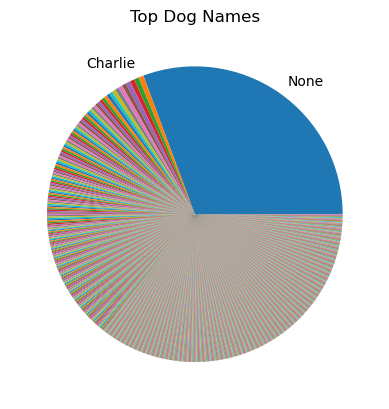

In [54]:
# Showing the comparison of dog names with a pie chart
import numpy as np
%matplotlib inline

labels = np.full(len(tidied_master_dog_tweet_dataset.dog_name.value_counts()), '', dtype=object)
labels[0] = 'None'
labels[1] = 'Charlie'
tidied_master_dog_tweet_dataset.dog_name.value_counts().plot(kind='pie', title='Top Dog Names', ylabel='', labels=labels);